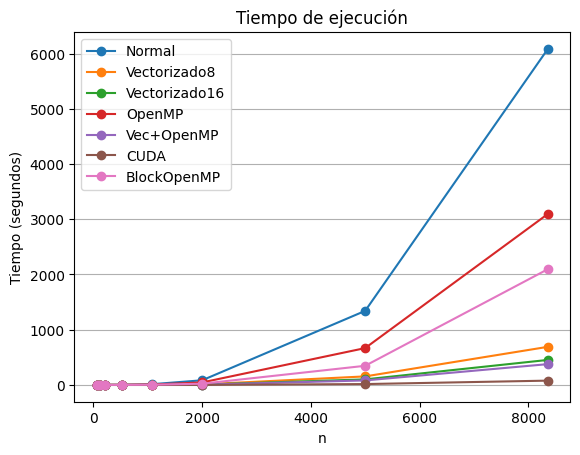

In [25]:
import matplotlib.pyplot as plt

# Datos
n = [64, 128, 214, 532, 1080, 2000, 5000, 8362]
normal = [4, 22.4, 111.7, 1577.3, 13463.1, 83954.4, 1341106.667, 6085037.5]
vectorizado8 = [0, 2, 12.3, 182.7, 1482.4, 10135.4, 154406.3333, 689809]
vectorizado16 = [0, 1, 8.1, 111.3, 920, 6239.4, 100318, 452683]
openmp = [3, 17.9, 69.8, 859.8, 7179, 44832.8, 667092, 3096147]
vec_openmp = [0.2, 1, 6.9, 107.9, 765.6, 5210.3, 81280.66667, 376512]
cuda = [8, 13, 15, 36.1, 154, 862, 15459, 77725.83]
block_openmp = [5, 17, 55, 486, 3292, 22001, 346436, 2097657]
# dev estandar cuda: 20.3372, 27.6803, 24.6698, 22.9976, 23.9833, 113.986, 754.679, 208.40
# 0
# Convertir a segundos
normal = [t / 1000 for t in normal]
vectorizado8 = [t / 1000 for t in vectorizado8]
vectorizado16 = [t / 1000 for t in vectorizado16]
openmp = [t / 1000 for t in openmp]
vec_openmp = [t / 1000 for t in vec_openmp]
cuda = [t / 1000 for t in cuda]
block_openmp = [t / 1000 for t in block_openmp]
# Crear grafico
plt.plot(n, normal, marker="o", label="Normal")
plt.plot(n, vectorizado8, marker="o", label="Vectorizado8")
plt.plot(n, vectorizado16, marker="o", label="Vectorizado16")
plt.plot(n, openmp, marker="o", label="OpenMP")
plt.plot(n, vec_openmp, marker="o", label="Vec+OpenMP")
plt.plot(n, cuda, marker="o", label="CUDA")
plt.plot(n, block_openmp, marker="o", label="BlockOpenMP")

# Configuraciones del grafico
plt.xlabel("n")
plt.ylabel("Tiempo (segundos)")
plt.title("Tiempo de ejecución")
plt.legend()
plt.grid(True, which="major", axis="y")

plt.savefig("grafico.png")
plt.show()

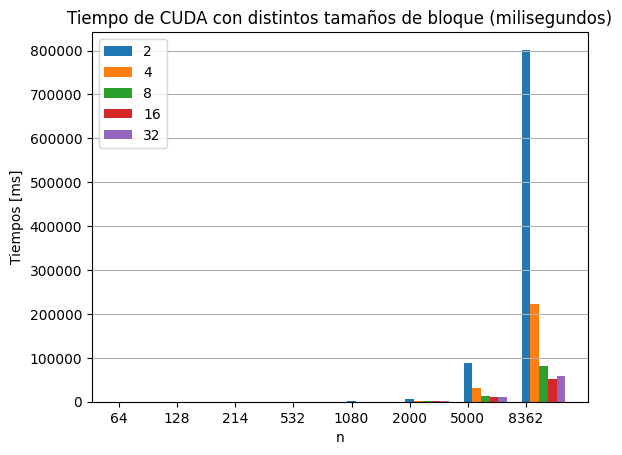

In [1]:
import numpy as np
import matplotlib.pyplot as plt

n = [64, 128, 214, 532, 1080, 2000, 5000, 8362]
block_sizes = [2, 4, 8, 16, 32]
tiempos = [
    [57, 57, 57, 58, 57],
    [61, 63, 59, 60, 59],
    [70, 63, 63, 62, 62],
    [210, 105, 86, 83.1, 83],
    [1146, 432, 254.7, 242.7, 229],
    [6107, 2004.9, 916.5, 877.2, 782.3],
    [88851, 31319, 12976, 11238, 9677.3],
    [801973, 223272, 81408, 52453, 57563],
]

bar_width = 0.15

# Calcular la posición de las barras en el eje x
x_pos = np.arange(len(n))

# Crear el gráfico de barras
fig, ax = plt.subplots()
for i in range(len(block_sizes)):
    ax.bar(
        x_pos + (i * bar_width),
        [tiempos[j][i] for j in range(len(n))],
        bar_width,
        label=f"{block_sizes[i]}",
    )

# Configurar etiquetas y título del gráfico
ax.set_xlabel("n")
ax.set_ylabel("Tiempos [ms]")
ax.set_title("Tiempo de CUDA con distintos tamaños de bloque (milisegundos)")

ax.set_xticks(x_pos)
ax.set_xticklabels(n)

# Agregar leyenda
ax.legend()
plt.grid(True, which="major", axis="y")
# Mostrar el gráfico
plt.show()